In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = ("Resources\Mouse_metadata.csv")
study_results_path = ("Resources\Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(study_results,mouse_metadata, how = "left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_study_data["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#create varialbe to find the duplicate mouse
duplicate_mice = mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.

#set duplicate mouse as variable
duplicate_mouse_ID = 'g989'

#call variable and tell it to grab all the data about g989
duplicate_mouse_ID = mouse_study_data[mouse_study_data["Mouse ID"] == duplicate_mouse_ID]

#print duplicate mouse info 
duplicate_mouse_ID
                        

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_data_clean = mouse_study_data[mouse_study_data['Mouse ID'].isin(duplicate_mice )==False]
mouse_study_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = len(mouse_study_data_clean["Mouse ID"].unique())
cleaned_mice_count

248

In [6]:
#Starter code notes
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [8]:
#calculate mean of tumor volume for each drug regimen
mean_tumor_volume = mouse_study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#calculate median of tumor volume for each drug regimen
median_tumor_volume = mouse_study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#calculate variance of tumor volume for each drug regimen
variance_tumor_volume = mouse_study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variance_tumor_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#calculate the standard variance of tumor volume of each drug regimen
standard_deviation_tumor_volume = mouse_study_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standard_deviation_tumor_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#calculate the SEM 
sem_tumor_volume = mouse_study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sem_tumor_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
summary_statistics_table = pd.DataFrame({"Mean Tumor Volume" : mean_tumor_volume,
                                        "Median Tumor Volume" : median_tumor_volume,
                                        "Tumor Volume Variance" : variance_tumor_volume,
                                        "Tumor Volume Std. Dev." : standard_deviation_tumor_volume,
                                        "Tumor Volume Std. Err." :sem_tumor_volume})
summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_table = mouse_study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
                           Mean='mean',
                           Median='median',
                           Variance='var',
                           Standard_Deviation='std',
                           SEM='sem')
summary_statistics_table

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_study_data_clean ["Drug Regimen"].value_counts()
regimen_counts


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

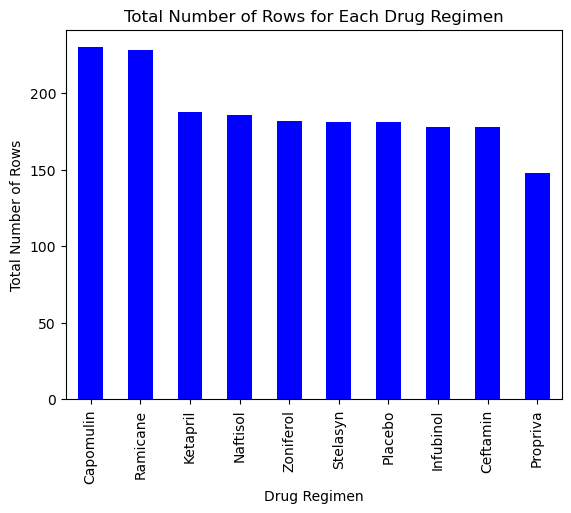

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts.plot(kind='bar', color='blue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = mouse_study_data_clean['Sex'].value_counts()
gender_counts

Sex
Male      958
Female    922
Name: count, dtype: int64

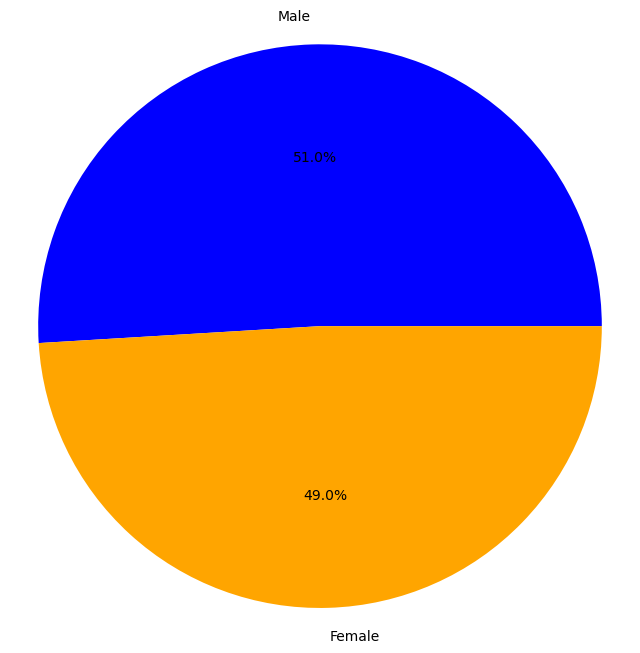

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.axis('equal') 
plt.show()

In [23]:
# Filter data for specific treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = mouse_study_data_clean[mouse_study_data_clean['Drug Regimen'].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this information with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, mouse_study_data_clean, on=['Mouse ID', 'Timepoint'], how='left')

# Display the DataFrame with the final tumor volume for each mouse across selected regimens
print(final_tumor_volume)


   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1

In [ ]:
# Starter Code 
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Assuming 'cleaned_data' is the DataFrame containing your data
# Assuming the column 'Drug Regimen' holds the treatment regimen information

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

In [20]:
# List of treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to store tumor volume data for plotting
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Filter data for each treatment
    treatment_data = mouse_study_data_clean[mouse_study_data_clean['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append tumor volume data to the list for plotting
    tumor_vol_data.append(treatment_data)
    
    # Calculate quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print potential outliers, if any
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ramicane: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


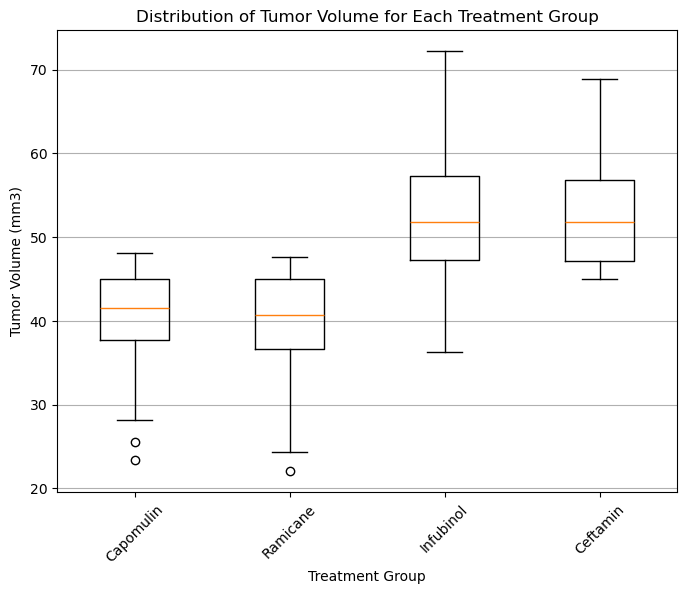

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Prepare data for boxplot
data_for_boxplot = [mouse_study_data_clean[mouse_study_data_clean['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
                    for treatment in treatments]

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data_for_boxplot, labels=treatments)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


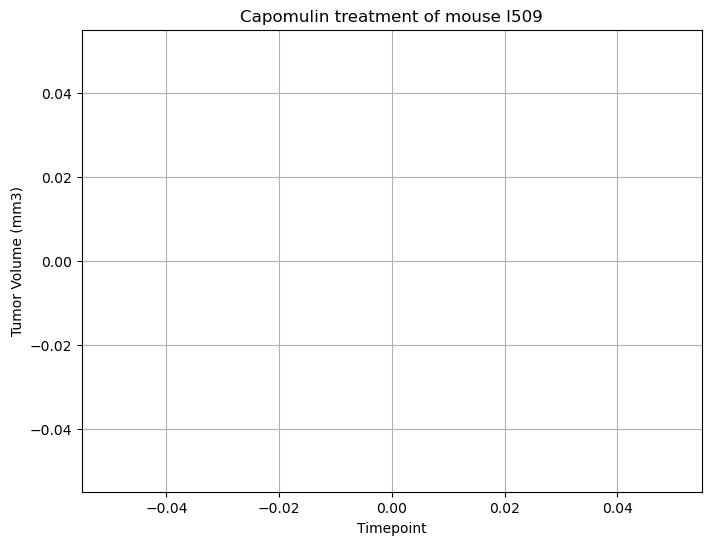

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Choose a specific mouse ID treated with Capomulin
selected_mouse_id = 'I509' 

# Filter data for the selected mouse treated with Capomulin
mouse_data = mouse_study_data_clean[(mouse_study_data_clean['Drug Regimen'] == 'Capomulin') & 
                          (mouse_study_data_clean['Mouse ID'] == selected_mouse_id)]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title(f"Capomulin treatment of mouse {selected_mouse_id}")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Prepare data for scatterplot 



In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
